# Dimension reduction and Clustering

In [2]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

## PCA: Data set swiss roll

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from sklearn import datasets
from sklearn.datasets import make_swiss_roll
%matplotlib inline

#X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
X, t = make_swiss_roll(n_samples=1000, noise=0.0, random_state=42)

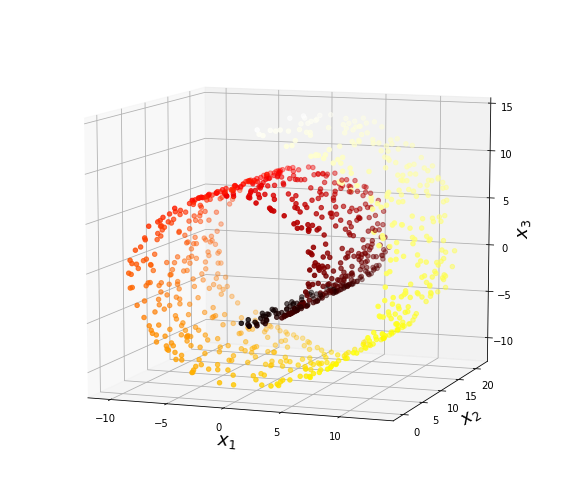

In [4]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

#save_fig("swiss_roll_plot")
plt.show()

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)           # transform to 2D

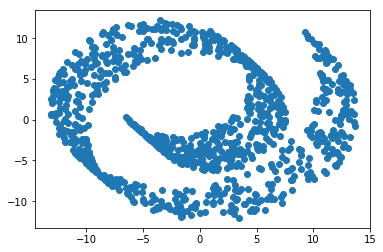

In [6]:
plt.scatter(X2D[:,0],X2D[:,1])

3 [0.40758356 0.71019299 1.        ]


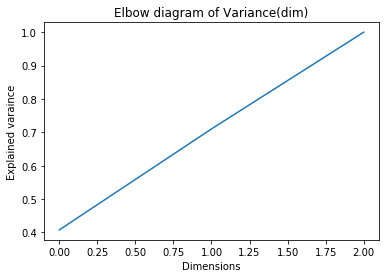

In [7]:
pca = PCA()
pca.fit(X)                                           # compute PCA without reducing dimensionality
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1                    # when is maximum reached for the first time?

fig = plt.figure()
ax = plt.axes()
ax.set(xlabel='Dimensions', ylabel='Explained varaince',
       title='Elbow diagram of Variance(dim)');
ax.plot(cumsum)
print(d,cumsum)

## PCA: Data set Countries of the world

In [8]:
dfNaN=pd.read_csv("countries of the world.csv",decimal=",")
dfStr=dfNaN.iloc[:,2:]
labCo=dfNaN.iloc[:,0].str[:3]
dsStr=dfStr.fillna(dfStr.mean())                       # deal with NaN
ds=dsStr.apply(pd.to_numeric, errors='coerce')
ds.head(10)

FileNotFoundError: [Errno 2] File b'countries of the world.csv' does not exist: b'countries of the world.csv'

In [9]:
labCo.head()

NameError: name 'labCo' is not defined

## Exercise PCA:
1. Determine X_reduced by applying PCA w.r.t. the Countries of the World data set (see above)
2. What is dimension _d_ for a 95% explanation of the variation? 
3. Plot Elbow diagram

In [10]:
from sklearn.preprocessing import StandardScaler
pca = PCA()
scaled = StandardScaler()                          # scale the datset
dsS = scaled.fit_transform(ds)
pca.fit(dsS)                                           # compute PCA without reducing dimensionality
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1                    # when is maximum reached for the first time?

fig = plt.figure()
ax = plt.axes()
ax.set(xlabel='Dimensions', ylabel='Explained varaince',
       title='Elbow diagram of Variance(dim)');
ax.plot(cumsum)
print(d,cumsum)

# Better is to run it without a to be monitored np.cumsum
X_train   = ds
pca       = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)

NameError: name 'ds' is not defined

## t-SNE: Data set swiss roll

In [10]:
from   sklearn.manifold import TSNE

In [11]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
tsne = TSNE(n_components=2, random_state=0)
xy = tsne.fit_transform(X)

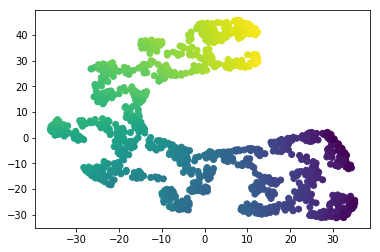

In [12]:
plt.scatter(xy[:,0],xy[:,1],c = t)     # wrong colourmap

## Exercise t-SNE:
1. Run t-SNE on the original Countries of the World data set (see above)
2. Run t-SNE on the PCA compressed (95%) Countries of the World data set
3. Compare results

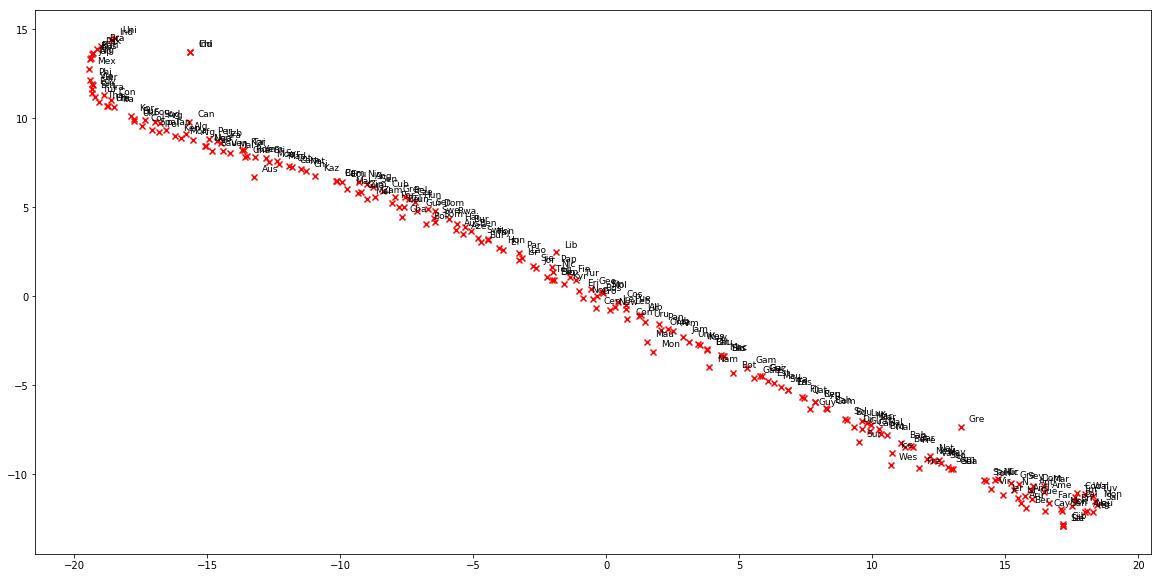

In [13]:
# global ds (Countries of the World still valid here)
tsne2 = TSNE(n_components=2, random_state=0)
xy = tsne2.fit_transform(ds)
    
plt.figure(figsize=(20, 10))
for i,co in enumerate(labCo.tolist()):
    x = xy[i,0]
    y = xy[i,1]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x+0.3, y+0.3, co, fontsize=9)

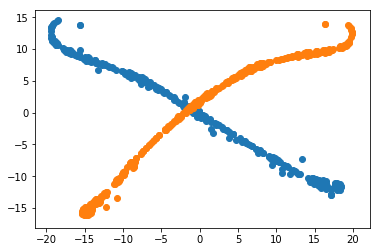

In [14]:
# global ds (Countries of the World still valid here)
tsne = TSNE(n_components=2, random_state=0)
xy = tsne.fit_transform(ds)
tsne2 = TSNE(n_components=2, random_state=0)
xy2 = tsne2.fit_transform(X_reduced)
plt.scatter(xy[:,0],xy[:,1])
plt.scatter(xy2[:,0],xy2[:,1])

### Problem with PCA's inverse transform

####global ds (Countries of the World still valid here)
pca=PCA(n_components = 2)
X_reduced=pca.fit(ds)
X_recovered=pca.inverse_transform(X_reduced)

tsne2 = TSNE(n_components=2, random_state=0)
xy = tsne2.fit_transform(X_recovered)
    
plt.figure(figsize=(15, 20))
for i,co in enumerate(labCo.tolist()):
    x = xy[i,0]
    y = xy[i,1]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x+0.3, y+0.3, co, fontsize=9)
plt.show()

## k-Means: Data set swiss roll

In [15]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)                   # Number of clusters == 3
kmeans = kmeans.fit(X)                          # Fitting the input data
labels = kmeans.predict(X)                      # Getting the cluster labels
centroids = kmeans.cluster_centers_             # Centroid values
print("Centroids are:", centroids)              # From sci-kit learn

Centroids are: [[ 3.85182027 11.45035838  7.92431539]
 [ 5.90024968 10.30665853 -4.18016075]
 [-7.14007949 10.10270418 -3.38446742]]


## Exercise k-Means:
1. Plot the clusters in 3D by colouring all labels belonging to their class (check the PCA cells above)
2. Comment the results

[[ 3.85182027 11.45035838  7.92431539]
 [ 5.90024968 10.30665853 -4.18016075]
 [-7.14007949 10.10270418 -3.38446742]]


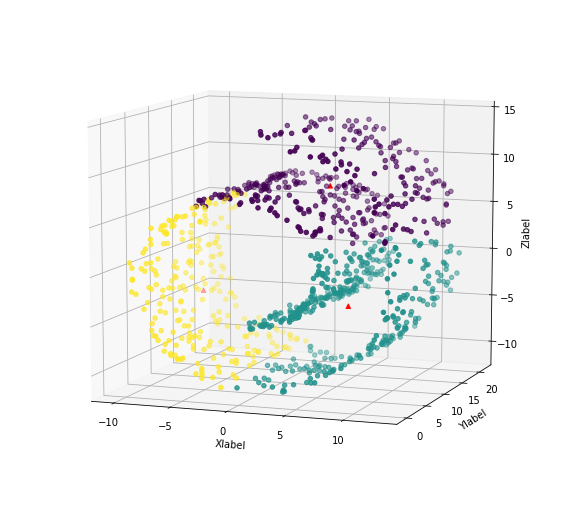

In [16]:
print(centroids)
fig = plt.figure(figsize = (10,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=labels)
ax.view_init(10, -70)
ax.set_xlabel("Xlabel", fontsize = 10)
ax.set_ylabel("Ylabel", fontsize = 10)
ax.set_zlabel("Zlabel", fontsize = 10)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], c='r', marker='^')

### Comment k-means:
Clearly one sees that the yellow inner part is incorrectly linked to the yellow outer part. Same for the purple cluster. Note the red markers: they indicate the centroids

## SOM: Data set swiss roll
#### https://arxiv.org/pdf/1305.1422.pdf
#### https://somoclu.readthedocs.io/en/stable/example.html

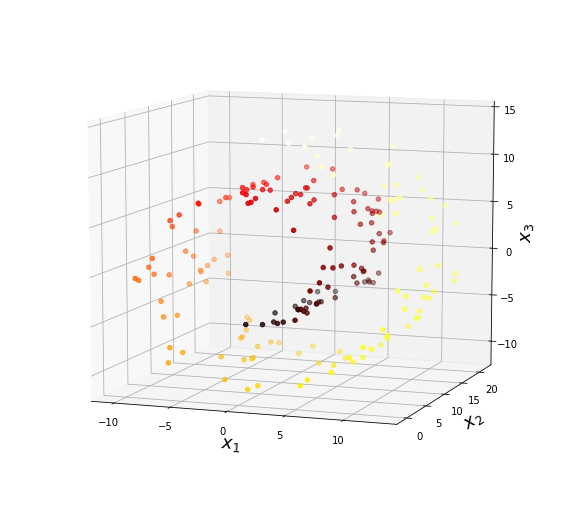

In [17]:
N_samples = 200
X, t = make_swiss_roll(n_samples=N_samples, noise=0.2, random_state=42)    #noise=0.2

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

#save_fig("swiss_roll_plot")
plt.show()

In [18]:
import somoclu

# SOM training
n_rows, n_columns = 100, 140
som = somoclu.Somoclu(n_columns, n_rows, data = X) # , maptype='toroid')
%time som.train()

Wall time: 1.37 s


In [19]:
print(som.codebook.shape) # code book vectors
print(som.bmus.shape)     # bmu vectors
print(som.umatrix.shape)  # umatrix
print(X.shape)            # train set shape

(100, 140, 3)
(200, 2)
(100, 140)
(200, 3)


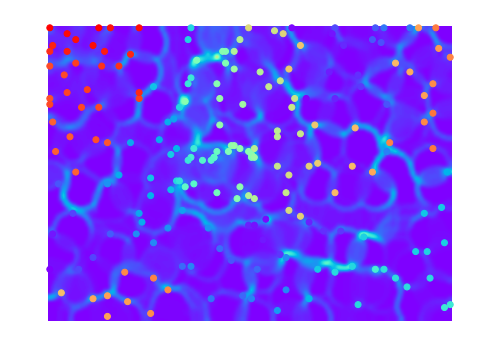

<module 'matplotlib.pyplot' from 'C:\\Users\\Jan\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [20]:
colors = t
som.view_umatrix(bestmatches=True, colormap='rainbow', bestmatchcolors=colors)

## Exercise SOM:
1. Apply SOM to the (cleaned up, i.e. resolved NaN issue) "Countries of the World" data set
2. Compare SOM with t-SNE and state your findings

In [1]:
# SOM traing
n_rows, n_columns = 100, 140
dsfp32=np.float32(ds)
som = somoclu.Somoclu(n_columns, n_rows, data = dsfp32)
%time som.train()

som.view_umatrix(bestmatches=True, labels=labCo.tolist())

NameError: name 'np' is not defined

### Comparison
t-SNE tries to stick with a 1D plot and makes it hard to see relations (labels obscure themselves).
SOM has 2D visualisation, but the SOMoclu library does not show the relations nicely, so I can not state a clear 
comparison :-(. However SOM shows clearly that China and India seem te be outliers. Why? And what would column wise normalisation 
        (e.g. Normal N(0,1)) show us?
